#### Importing libraries

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd



In [2]:
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Importing libraries for model preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
# Importing library for model building
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [5]:
# Importing libraries for removing warnings
import warnings as warnings
warnings.filterwarnings("ignore")

#### Sourcing File

In [6]:
# Importing the file
leads_df = pd.read_csv("Data_Science_Internship - Dump.csv",index_col=0)
leads_df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


#### Checking information

In [7]:
# Checking Shape
leads_df.shape

(46608, 15)

In [8]:
# Checking other values
leads_df.describe().T

,count,unique,top,freq
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186
status,46608,6,LOST,43244
lost_reason,43244,30,Low availability,8892
budget,42908,1857,£60 - £120 Per week,9862
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111
movein,32970,477,10/09/22,2453
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125


In [9]:
# Checking columns details
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


## Data Cleaning

- We will try to change '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' values of the columns to NAN.
- We will try to drop columns having 35% missing values.
- We will try to drop rows having 70% missing values
- We will try to merge unique categories if they are multiples.
- We will impute the missing values
- Categorical with mode value
- We will compare orginal with cleaned data

#### Dropping Duplicates & Basic Cleaning

In [10]:
# Calculating the shape after removing duplicates
leads_modified_df = leads_df.drop_duplicates(keep = 'first')
leads_modified_df.shape

(46598, 15)

<b>Note :-</b> Around 10 duplicate values found.

In [11]:
leads_modified_df = leads_modified_df[(leads_modified_df['status'] == 'WON') | (leads_modified_df['status'] == 'LOST')]
leads_modified_df['status'].value_counts()

LOST    43235
WON      3072
Name: status, dtype: int64

In [12]:
# Change the mapping of a column
leads_modified_df['status'] = leads_modified_df['status'].map({'WON':1, 'LOST':0})
leads_modified_df['status'].value_counts()

0    43235
1     3072
Name: status, dtype: int64

In [13]:
# Replacing the '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' with NaN
leads_modified_df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.NAN, inplace=True)
leads_modified_df.head(3)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...


In [14]:
# Function to remove the columns having more than 40% missing values
def rmissingvaluecol(dff, threshold):
    col = []
    col = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(col)))
    print("Columns to be dropped                             : ", list(set(list((dff.columns.values))) - set(col)))
    return col

# Removing columns having 40% missing values
col = rmissingvaluecol(leads_modified_df, 40)
leads_modified_df = leads_modified_df[col]
leads_modified_df.head()

Columns having more than 40 percent missing values:  1
Columns to be dropped                             :  ['room_type']


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


<b>Note :-</b> 1 column removed.

#### Drop rows that are having high percentage of missing values.

In [15]:
# Deleting rows containing either 70% or more than 70% NaN Values
perc = 70.0 
min_count =  int(((100-perc)/100)*leads_modified_df.shape[1] + 1)
leads_modified_df = leads_modified_df.dropna(axis=0, thresh=min_count)
leads_modified_df.shape

(46307, 14)

<b>Note :-</b> No rows deleted.

####  Check the number of unique categories in each categorical column.

In [16]:
# Checking the unique categories
column_names = leads_modified_df.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(leads_modified_df[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name        : st

In [17]:
# Removing columns with highly skewed data
skewed_columns_to_be_dropped = ['des_country','lead_id']

leads_modified_df.drop(skewed_columns_to_be_dropped, axis=1, inplace=True)
leads_modified_df.shape

(46307, 12)

<b>Note :-</b> A few columns are removed as they may skew the model.

#### calculating % of missing values

In [18]:
round(leads_modified_df.isnull().sum() * 100 / len(leads_modified_df), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.96
lease              5.04
movein            29.38
source            12.84
source_city       19.05
source_country    18.60
utm_source         0.13
utm_medium         6.87
des_city           5.46
dtype: float64

In [19]:
leads_modified_df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city'],
      dtype='object')

#### For the columns with less percentage of missing, use some imputation technique.

In [20]:
# Listing down categorical columns with missing values
categorical_column_names = ['lost_reason', 'budget', 'lease', 'movein','source', 'source_city', 'source_country', 'des_city','utm_source','utm_medium']
for column_name in categorical_column_names:
    print("Column Name        :", column_name)
    print("------------------------------")
    #print("Unique Values      : ", leads_modified_df[column_name].unique())
    
    values_to_be_imputed = leads_modified_df[column_name].isnull().sum()
    print("Any Null (Before)  :", values_to_be_imputed)
    
    leads_modified_df[column_name].fillna(leads_modified_df[column_name].mode()[0], inplace=True)
    print(values_to_be_imputed, " values imputed with mode values of the column.")
    
    print("Null Values (After):", leads_modified_df[column_name].isnull().sum())
    print('\n')

Column Name        : lost_reason
------------------------------
Any Null (Before)  : 3072
3072  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : budget
------------------------------
Any Null (Before)  : 3687
3687  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : lease
------------------------------
Any Null (Before)  : 2334
2334  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : movein
------------------------------
Any Null (Before)  : 13605
13605  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source
------------------------------
Any Null (Before)  : 5946
5946  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source_city
------------------------------
Any Null (Before)  : 8821
8821  values imputed with mode values of the column.
Null Values (After): 0


Column Name

In [21]:
# Checking the unique categories
column_names = leads_modified_df.columns

for column_name in column_names:
    print("Column Name        :", column_name)
    print("-----------------------------------------------------")
    print(leads_modified_df[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
-----------------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name 

In [22]:
# Changing categories with lesser percentage to 'others'

def change_to_others(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 10:
            return 'others'
    return x

# Checking the unique categories
columns_not_to_be_considered = ['status']
column_names = leads_modified_df.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

for column_name in columns_to_be_changed:
    print("Column Name : ", column_name)
    print("-----------------------------------------")

    value_counts_df = leads_modified_df[column_name].value_counts(normalize=True) * 100
    print("Before :")
    print(value_counts_df)
    print('\n')

    leads_modified_df[column_name] = leads_modified_df[column_name].apply(lambda x:change_to_others(x, value_counts_df))
    value_counts_df = leads_modified_df[column_name].value_counts(normalize=True) * 100
    print("After :")
    print(value_counts_df)
    print('\n')

Column Name :  Agent_id
-----------------------------------------
Before :
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


After :
others       

After :
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    58.909020
others                                                              26.071652
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    15.019328
Name: source_country, dtype: float64


Column Name :  utm_source
-----------------------------------------
Before :
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3    66.801995
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    10.253309
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a     4.258535
3c77f261a156a5308fee53720276395ef78d2e7367e4225a3d3d93f4accd1dd3     3.759691
d15690f08a575024650b01ffac892cfd2b93e6c57c140f1b6d9e47753cabd579     3.295398
9ac56ef275bb33f0f931abd846e53e845a80af8a549100741e928b8b2abd56a7     2.699376
ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18cefab426165e06a424b1     2.260997
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158     1.865809
44574c4ba2ea74ad4b

In [23]:
leads_modified_df = leads_modified_df.dropna()

In [24]:
# Verifying various parameters after cleaning
print("Before Cleaning Data")
print("*********************************")
print("Shape: ", leads_df.shape)
print("Missing:")
print("-----------------------")
print(round(leads_df.isnull().sum()*100/len(leads_df), 2))

print('\n')
print("After Cleaning Data")
print("*********************************")
print("Shape: ", leads_modified_df.shape)
print("Missing:")
print("-----------------------")
print(round(leads_modified_df.isnull().sum()*100/len(leads_modified_df), 2))

Before Cleaning Data
*********************************
Shape:  (46608, 15)
Missing:
-----------------------
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
movein            29.26
source             0.00
source_city        0.00
source_country     0.00
utm_source         0.00
utm_medium         0.00
des_city           0.00
des_country        0.00
room_type         50.52
lead_id            0.00
dtype: float64


After Cleaning Data
*********************************
Shape:  (46307, 12)
Missing:
-----------------------
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
dtype: float64


### Data Preparation
- We will create dummies for categorical columns.
- We will split data into train-test set.
- We will perform scaling.

#### Create dummies for all categorical columns.

In [25]:
column_names = ['Agent_id','lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city']

for column_name in column_names:
    dummies = pd.get_dummies(leads_modified_df[column_name])
    dummies.drop('others', axis=1, inplace=True)
    leads_modified_df = pd.concat([leads_modified_df, dummies], axis=1)
    leads_modified_df.drop(column_name, axis=1, inplace=True)
    print("Dummies created for: ", column_name)

leads_modified_df.head()

Dummies created for:  Agent_id
Dummies created for:  lost_reason
Dummies created for:  budget
Dummies created for:  lease
Dummies created for:  movein
Dummies created for:  source
Dummies created for:  source_city
Dummies created for:  source_country
Dummies created for:  utm_source
Dummies created for:  utm_medium
Dummies created for:  des_city


,status,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,...,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1


#### Splitting the data into train-test set

In [26]:
# Putting feature variable to X
X = leads_modified_df.drop('status', axis=1)

X.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,Complete Education Year Stay 50 - 52 weeks,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1


In [27]:
# Putting response variable to y
y = leads_modified_df.status
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [28]:
# Splitting the data into train and test on a ratio of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the continuous data

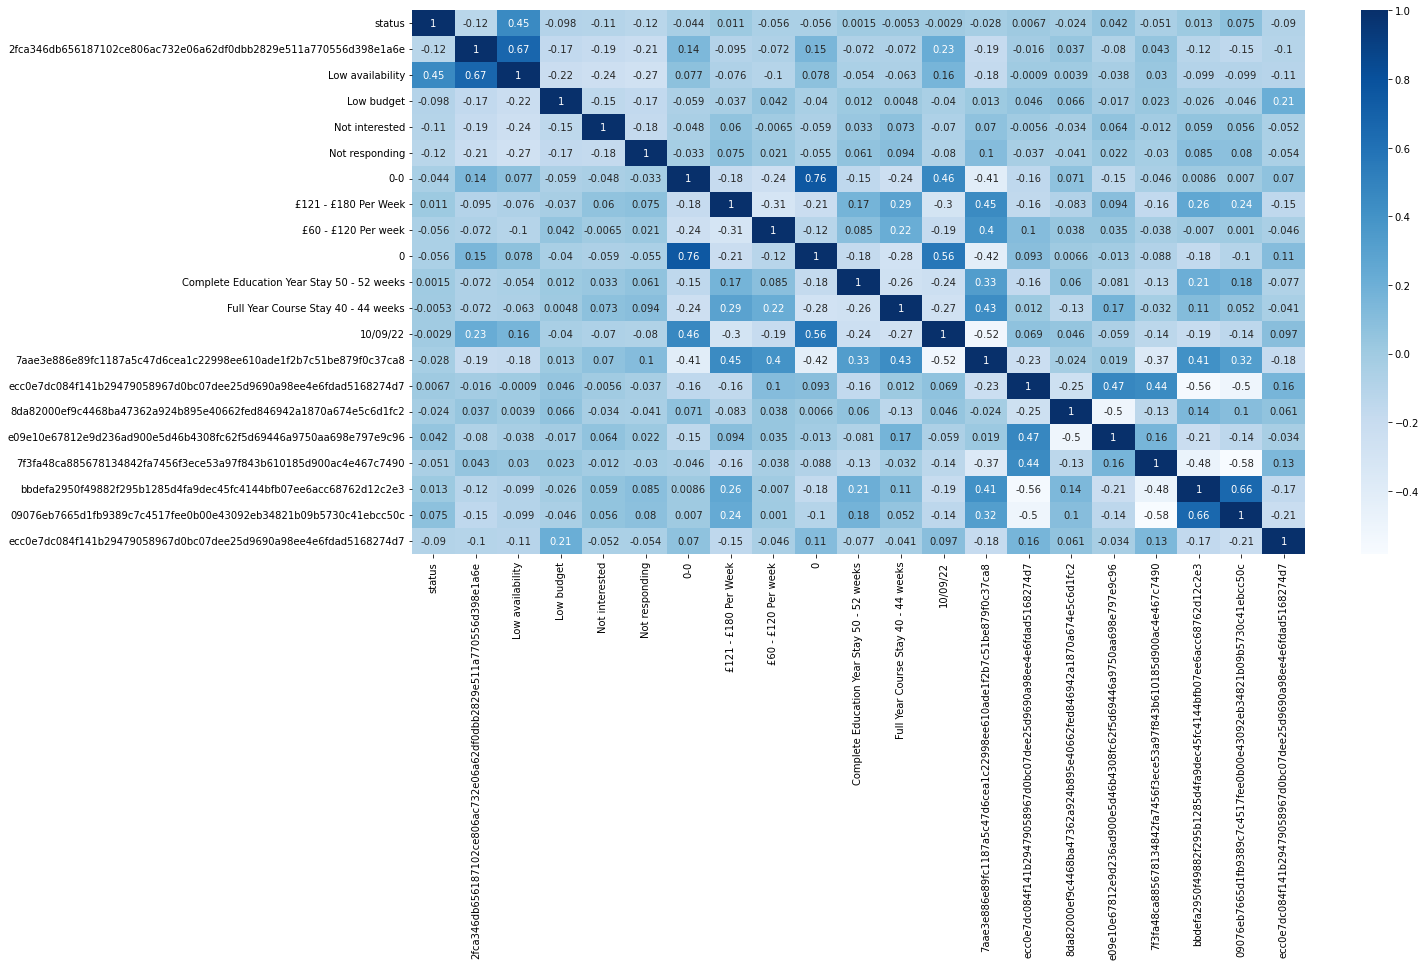

In [29]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_modified_df.corr(), annot = True, cmap="Blues")
plt.show()

Model Building
- We will try to build Decision Tree model.


#### Building our first model 

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}
Cross-validation score: 0.9918747114623679


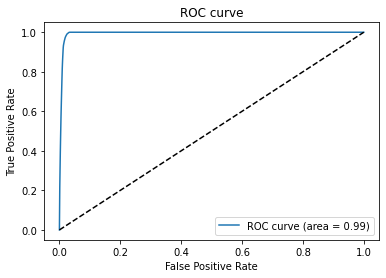

In [43]:
# define the hyperparameter grid
param_grid = {'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 5)}

# create the decision tree model
model = DecisionTreeClassifier()

# perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# train the model with the best hyperparameters
model = DecisionTreeClassifier(**grid_search.best_params_)
model.fit(X, y)

# compute cross-validation score
cv_score = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# print the cross-validation score
print('Cross-validation score:', cv_score.mean())

# compute ROC curve and AUC score
probas = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, probas)
auc_score = roc_auc_score(y, probas)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

To build an ML model that predicts the lead score based on the input set of features, we followed the following steps:

- Load the dataset into a Pandas dataframe.
- Drop the leads with STATUS other than ‘WON’ or ‘LOST’ as per the instructions.
- Replace all occurrences of the value '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' with NaN.
- Check for missing values and handle them appropriately.
- Convert all columns to categorical columns.
- Select the relevant features for training the model based on domain knowledge and EDA.
- Split the data into training and testing sets.
- Train the model using an appropriate algorithm and evaluate its performance on the testing set using accuracy, precision, recall, and F1-score.